# Домашнее задание по теме "работа с переменными"

***Цель задания*** - закрепить полученные навыки.  

***Описание адания:***
Потренируем навыки, полученные на практическом занятии. Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.
Данные вы сможете получить исполнив следующий код:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()[‘filename’], skiprows=1)
Переменная, которую надо предсказать - ’MEDV’.
Прочитать информацию о содержимом датасета:
print(load_boston()[‘DESCR’])
Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.  

***План:***
1. Изучить датасет
2. Провести эксплоративный анализ данных; наметить варианты модификации датасета в целях минимизации ошибки.
3. Обучать линейную регрессию, изменяя при этом данные, сравнивать результат
4. Написать вывод

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from mlxtend.evaluate import bias_variance_decomp

### Шаг 1. Изучение датасета

In [4]:
houses = pd.read_csv(load_boston()['filename'], skiprows=1)
houses

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Итак, пропусков нет. Это хорошо. Переходим к анализу данных.

### Шаг 2. Эксплоративный анализ

Посмотрим на статистическую сводку:

In [7]:
houses.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Согласно данным, полученным методом "describe", можно выявить некие странности. Так, например, в первой же колонке "CRIM" (Уровень преступности на душу населения в городе) 75% квантиль показывает 3.677082, но максимальное значение - 88.976200. Явно выброс. Надо будет посмотреть поближе. Похожая ситуация в следующем столбце - "ZN" (доля жилой земли, зонированной для участков более 25 000 кв. футов) - уж больно велико для столбца стандартное отклонение - 23,322453. У остальных столбцов таких явных колебаний нет. Тем не менее, посмотрим их все поступательно.

Для EDA напишем функцию, позволяющую построить гистограмму и боксплот:

In [8]:
def plotting(column):
    print('\x1b[1;0346m'+'Boxplot {}'.format(column.name) +'\x1b[0m')
    sns.boxplot(x=column)
    plt.show()
    print('\x1b[1;0346m'+'Distplot {}'.format(column.name)+'\x1b[0m')
    sns.distplot(column)
    plt.show()

Вызовем функцию для первого столбца:  

***CRIM:***

Boxplot CRIM


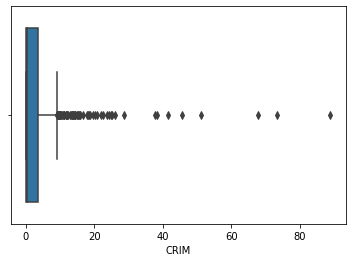

Distplot CRIM


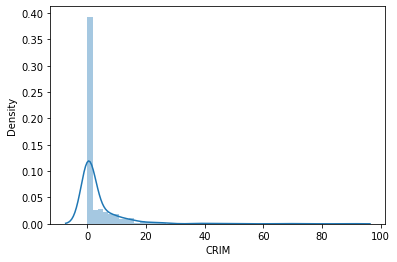

In [9]:
plotting(houses['CRIM'])

Что мы видим на боксплоте: хвост больших значений, причем действительно есть значение более 80. Пока нельзя сказать точно, являются ли выбросами значения от 30 и выше и как они повлияют на обучение модели, поэтому оставим пока всё как есть.  
На гистограмме большая часть значений лежит на границе с нулем. Интересно, чо это за значения и сколько их:

In [10]:
houses[houses['CRIM'] <10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


452 строки. Почти весь датасет. Тем более странно значение 88,97: что за преступный рай? Действительно ли есть такие районы, где на 10% мирных жителей приходится почти 90% преступников?

Идем дальше:

***ZN:***

Boxplot ZN


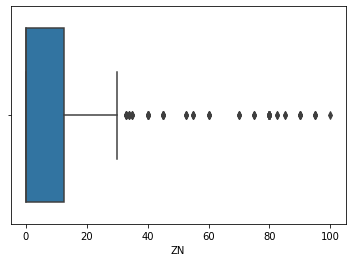

Distplot ZN


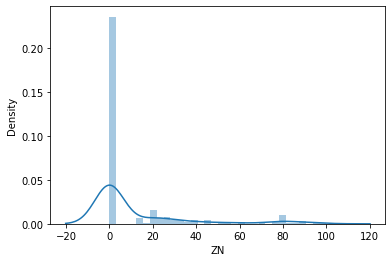

In [11]:
plotting(houses['ZN'])

И снова большая часть значений у нуля. Также есть несколько значений больше 40. Тoже похоже на выбросы.

***INDUS:***

Boxplot INDUS


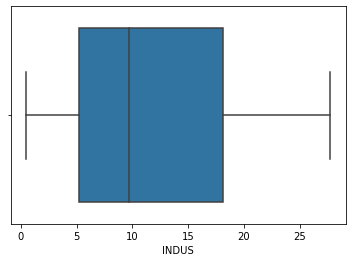

Distplot INDUS


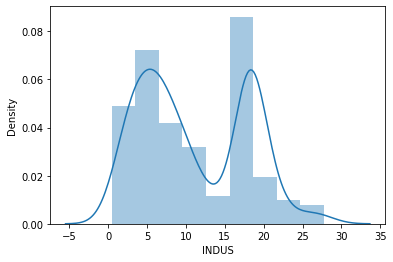

In [12]:
plotting(houses['INDUS'])

Здесь уже картинка гораздо лучше. чистый боксплот, без выбросов. Гистограмма, конечно, далека от нормального распределения, и имеет аж 2 вершины. Посмотрим поближе:

In [13]:
middle_indus = houses[(15 < houses['INDUS']) &  (houses['INDUS']< 20)]
middle_indus

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
92,0.04203,28.0,15.04,0,0.464,6.442,53.6,3.6659,4,270,18.2,395.01,8.16,22.9
93,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270,18.2,396.33,6.21,25.0
94,0.04294,28.0,15.04,0,0.464,6.249,77.3,3.6150,4,270,18.2,396.90,10.59,20.6
142,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403,14.7,396.90,26.82,13.4
143,4.09740,0.0,19.58,0,0.871,5.468,100.0,1.4118,5,403,14.7,396.90,26.42,15.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2.81838,0.0,18.10,0,0.532,5.762,40.3,4.0983,24,666,20.2,392.92,10.42,21.8
484,2.37857,0.0,18.10,0,0.583,5.871,41.9,3.7240,24,666,20.2,370.73,13.34,20.6
485,3.67367,0.0,18.10,0,0.583,6.312,51.9,3.9917,24,666,20.2,388.62,10.58,21.2
486,5.69175,0.0,18.10,0,0.583,6.114,79.8,3.5459,24,666,20.2,392.68,14.98,19.1


Boxplot INDUS


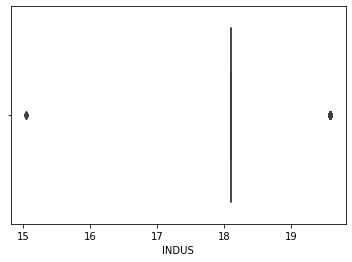

Distplot INDUS


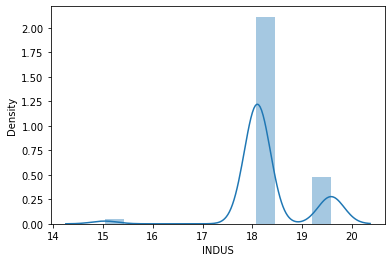

In [14]:
plotting(middle_indus['INDUS'])

Получается, у 165 домов промышленная зона занимает порядка 18,5% площади города. Также есть и те строки, где этот показатель приближается к 28. Интересно, как сильно этот показатель влияет на таргет?

In [15]:
del middle_indus

***CHAS:***

Boxplot CHAS


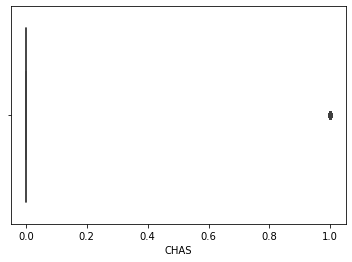

Distplot CHAS


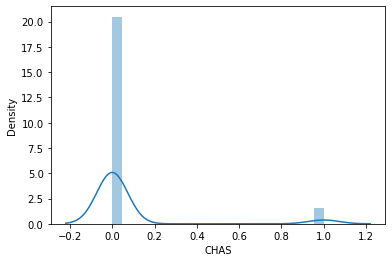

In [16]:
plotting(houses['CHAS'])

Поскольку это фиктивная переменная, где присваивается 1, если у участка есть река в качестве границы и 0, если это не так, то можно заметить, что там, где значение =1 является тоже в своём роде выбросом. Перепроверим:

In [17]:
len(houses[houses['CHAS'] == 1])

35

Действительно, это так. 35 против 471.

Boxplot NOX


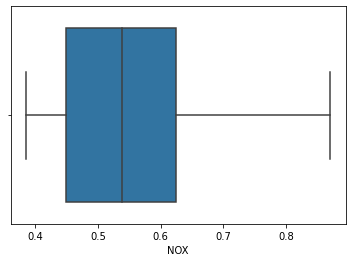

Distplot NOX


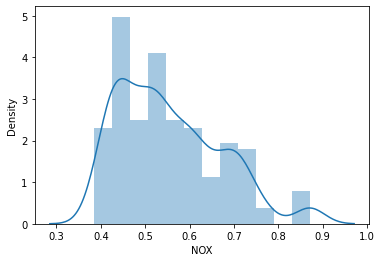

In [18]:
plotting(houses['NOX'])

Здесь также выбросов нет, но при этом видно, что содержание оксида азота в некоторых районах достаточно велико, что должно сказаться на средней стоимости.

***RM***

Boxplot RM


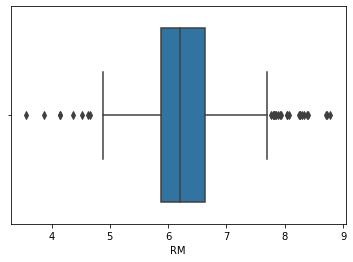

Distplot RM


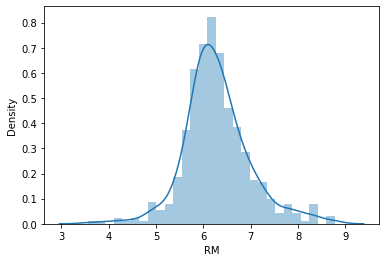

In [19]:
plotting(houses['RM'])

Это распределение мне уже радует глаз. Видно, что в большинстве своем общее число комнат 6-7. Выбросы также есть, но их не так много. Также можно отметить, что варианты, где количество комнат больше среднего, встречаются чаще, чем где комнат меньше среднего.

***AGE***

Boxplot AGE


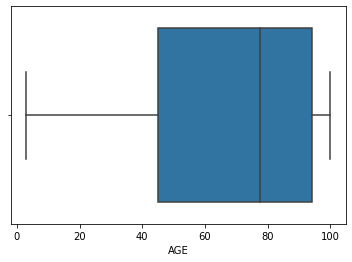

Distplot AGE


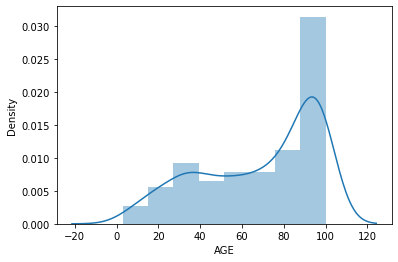

In [20]:
plotting(houses['AGE'])

Касаемо столбца "AGE" можно сказать, что есть территории, где 100% домов являются довоенными постройками (до 1940 года). Хорошо это или плохо для стоимости - узнаем.

***DIS***

Boxplot DIS


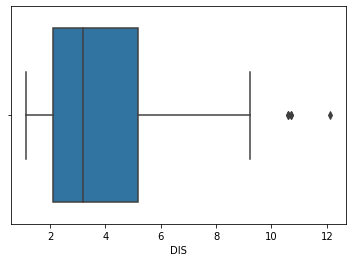

Distplot DIS


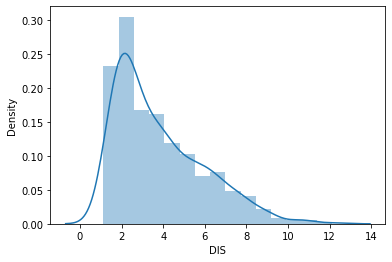

In [21]:
plotting(houses['DIS'])

Взвешенное расстояния до 5 Бостонских центров занятости в большинстве своем меньше 9. Выбросы есть, но их очень мало.

***RAD***

Boxplot RAD


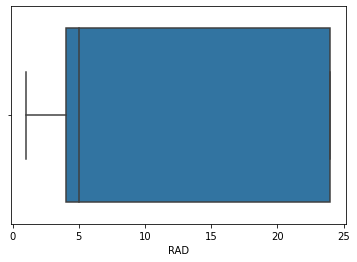

Distplot RAD


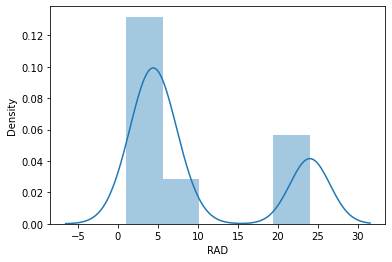

In [22]:
plotting(houses['RAD'])

И снова 2 вершины на гистограмме. Отдельного внимания заслуживает боксплот: медиана сдвинута влево, какой же большой третий квартиль.Если посмотреть на таблицу выше (houses.describe()), то можно увидеть, что медиана равна 5, а 75% - 24. Отсюда и результат на боксплоте.

***TAX***

Что нам покаже налог:

Boxplot TAX


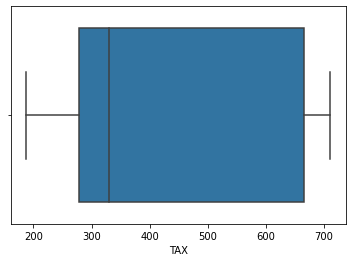

Distplot TAX


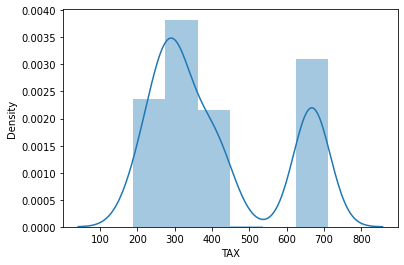

In [23]:
plotting(houses['TAX'])

Снова 2 вершины и полное отсутствие значений в интервале 450 - 610. Выбросов нет.

***PTRATIO***

Boxplot PTRATIO


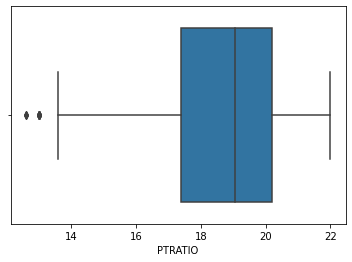

Distplot PTRATIO


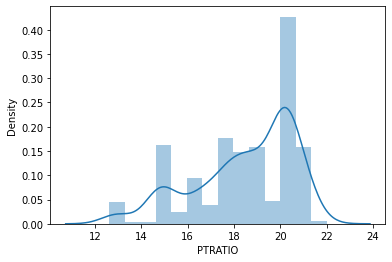

In [24]:
plotting(houses['PTRATIO'])

Пара выбросов - слишком мало учителей в соотношении количества учителей к количеству учеников. Не самые благополучные районы.

***В***

Boxplot B


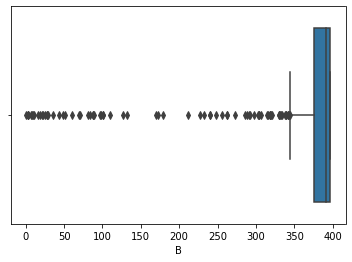

Distplot B


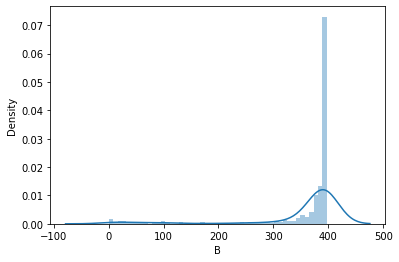

In [25]:
plotting(houses['B'])

Данный показатель рассчитывается по формуле. Интересно, что доля людей с темным цветом кожи в некоторых районах слишком мала. Является ли этот фактор решающим при ценообразовании?

***LSTAT***

А что насчет процента людей с низким социальным статусом?

Boxplot LSTAT


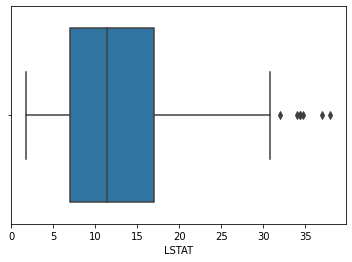

Distplot LSTAT


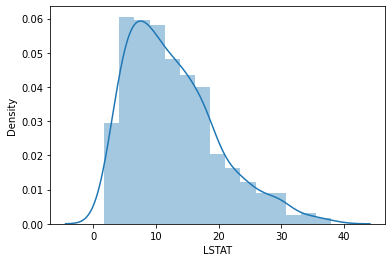

In [26]:
plotting(houses['LSTAT'])

Есть часть значений, где процент таких людей более 35. 

***MEDV***

И наша целевая переменная:

Boxplot MEDV


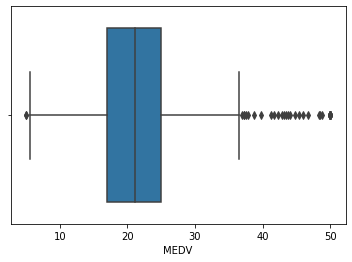

Distplot MEDV


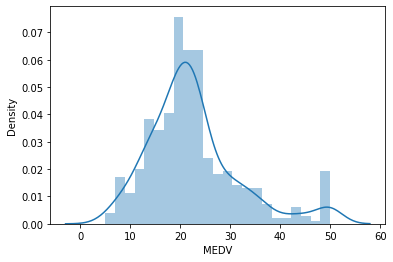

In [27]:
plotting(houses['MEDV'])

Распределение могло быть близким к гауссовскому, однако есть несколько выбросов справа - вершина около значения 50 на гистограмме.

С данными познакомились. Теперь посмотрим на зависимости. Посчитаем корреляции:

In [28]:
houses.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Таблица вышла слишком сложная для восприятия, но тем не менее обратим внимание на целевую переменную и на наиболее сильно влияющие на нее столбцы:

- нельзя не отметить, что медианная стоимость обратно пропорциональна количеству людей с низким соц.статусом (отрицательная корреляция: -0.737)
- стоимость также хорошо коррелирует с количеством комнат. Действительно: чем больше комнат, тем выше цена
- корреляция 0.5 между ценой и коэффициентом отношения числа учителей к числу учеников. Не самое сильное влияние на таргет, но, тем не менее, оно есть.
- и последнее, что можно отметить: чем больше площадь промзоны, тем ниже может быть медианная стоимость.

Теперь построим тепловую карту, чтобы определить, как коррелируют между собой другие столбцы. Для эффективного обучения нам нужно, чтобы между столбцами не было линейной зависимости. Визуально по получившейся таблице сложно посмотреть корреляцию. Построим график:

<AxesSubplot:>

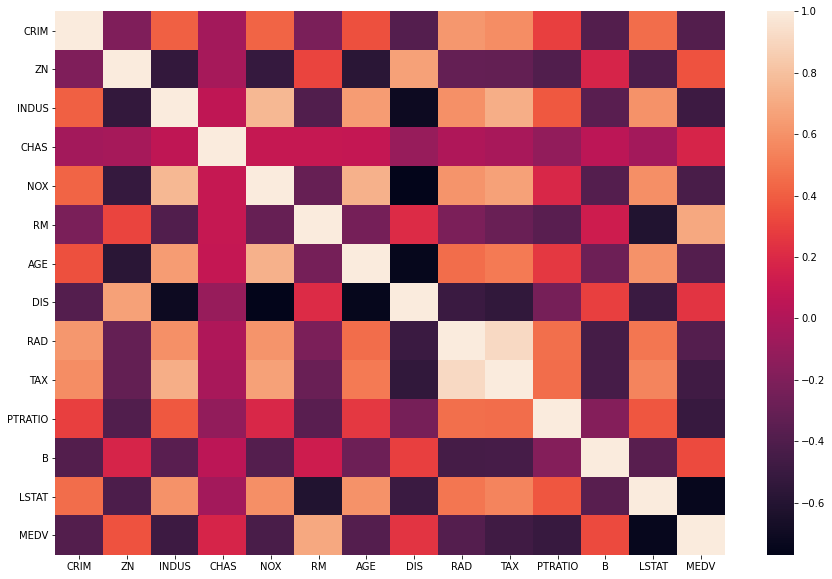

In [29]:
plt.rcParams["figure.figsize"] = (15,10)
sns.heatmap(houses.corr())

Что можно сказать:  
- обратная пропорциональность между расстоянием до центров занятости и:
    - промзоной в районе;
    - оксидом азота в воздухе;
    - количеством старых домов;
    - налогом
- прямая зависимость между доступностью радиальных магистралей и налогом. Посмотрим на таблицу: 0,91.
        
Получается, у нас довольно сильная зависимость проявляется в отношении двух колонок: DIS (расстояние до центров занятости) и TAX (налог). Причем если у столбца с налогом в основном прямая зависимость, то у расстояния до центров занятости - обратная.
Таким образом, у нас 2 кандидата на вылет. Возможно, именно эти столбцы помешают модели хорошо предсказывать.

### Шаг 3. Обучение модели

Перейдем к обучению модели. Напишем функцию, которая на вход будет получать фичи и таргет, а на выходе покажет качество модели и лучшие признаки для обучения:

In [30]:
def linear_regression(X, y, X_test, y_test, columns):
    model = LinearRegression().fit(X, y)
    predict = model.predict(X_test)
    mse = mean_squared_error(y_test, predict)   
    
    coef = pd.Series(model.coef_, index = columns)
    imp_coef = coef.sort_values()

    plt.rcParams['figure.figsize'] = (8.0, 10.0)
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using Linear Regression Model")
    return mse

Теперь напишем функцию, подготавливающую наш датасет к обучению модели:

In [31]:
def prepare_X_and_y(data):
    features = data.drop('MEDV', axis=1)    # формируем фичи и таргет
    target = data['MEDV']
    
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.33, random_state=42)
    
    scaler = StandardScaler() 
    scaler.fit(features_train)                             # стандартизируем фичи
    features_train = scaler.transform(features_train)
    features_test = scaler.transform(features_test) 
    
    return features_train, features_test, target_train, target_test

Вызываем функцию для подготовки признаков:

In [32]:
X_train, X_test, y_train, y_test = prepare_X_and_y(houses)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((339, 13), (167, 13), (339,), (167,))

Обучаем модель на всех наших признаках:

20.72402343733976

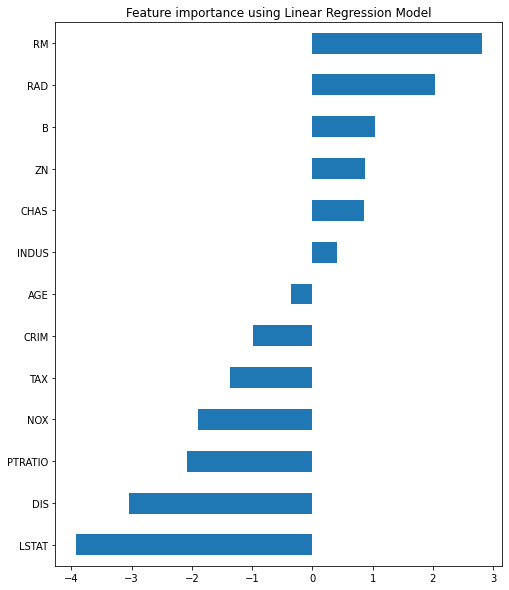

In [34]:
mse = linear_regression(X_train, y_train, X_test, y_test, houses.drop('MEDV', axis=1).columns)
mse

Исходя из вывода функции: ошика достаточно большая. Будем уменьшать. Наиболее значимые фичи: NOX, RM, DIS, PTRATIO и CHAS. Это немного удивительно, ведь NOX и CHAS не имеют такой сильной корреляции как отмеченные выше столбцы. Тем не менее, на данном датасете они сыграли важную роль. Обучим модель теперь только на них: 

28.055710336575544

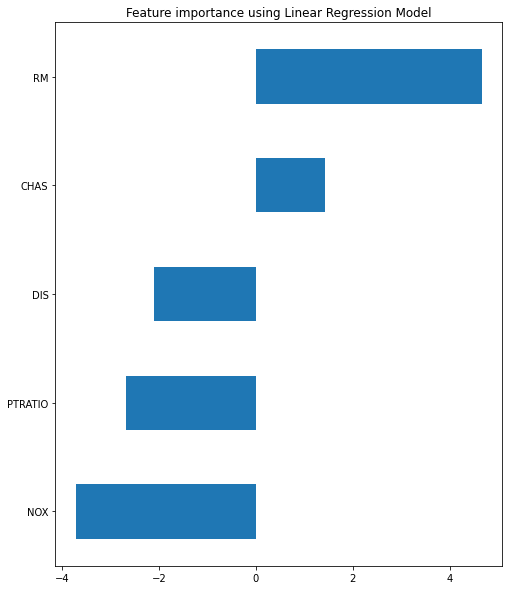

In [36]:
houses_1 = houses[['NOX', 'RM', 'DIS', 'PTRATIO', 'CHAS', 'MEDV']]
X_train_1, X_test_1, y_train_1, y_test_1 = prepare_X_and_y(houses_1)

mse_1 = linear_regression(X_train_1, y_train_1, X_test_1, y_test_1, houses_1.drop('MEDV', axis=1).columns)
mse_1

Ошибка стала выше, а наиболее значимым признаком стало количество комнат.  

Попробуем теперь в цикле обучить модель, используя только по одной колонке в качестве признака. Где будет результат лучше?

In [38]:
for i in houses.drop('MEDV', axis=1).columns:
    X_i = houses[['{}'.format(i), 'MEDV']]
    X_train_i, X_test_i, y_train_i, y_test_i = prepare_X_and_y(X_i)

    model_i = LinearRegression().fit(X_train_i, y_train_i)
    predict_i = model_i.predict(X_test_i)
    mse_i = mean_squared_error(y_test_i, predict_i) 
    print('\x1b[1;0346m'+'{}: '.format(i) +'\x1b[0m', mse_i)

CRIM:  64.21031631076897
ZN:  64.20859106751595
INDUS:  55.15542832056455
CHAS:  79.8192375575832
NOX:  62.345745721118504
RM:  39.091051114869956
AGE:  64.45241584915274
DIS:  72.41783109644466
RAD:  66.2273648034406
TAX:  57.547077436329005
PTRATIO:  54.066410244223306
B:  68.44756562494078
LSTAT:  38.41007511766233


Лучший результат у столбца LSTAT. Лучше всего модель предсказывает результат по проценту низких слоёв населения.

И всё же ошибка существенно выше изначальной. Попробуем поработать с выбросами (отдельно каждый столбец). Далее обучим модель снова.

Столбец "CRIM":

In [39]:
len(houses[houses['CRIM'] > 40])

6

Удалим 6 самых больших значений:

In [40]:
houses_2 = houses[houses['CRIM'] < 40]
houses_2.shape

(500, 14)

Обучим модель теперь:

19.075142352100215

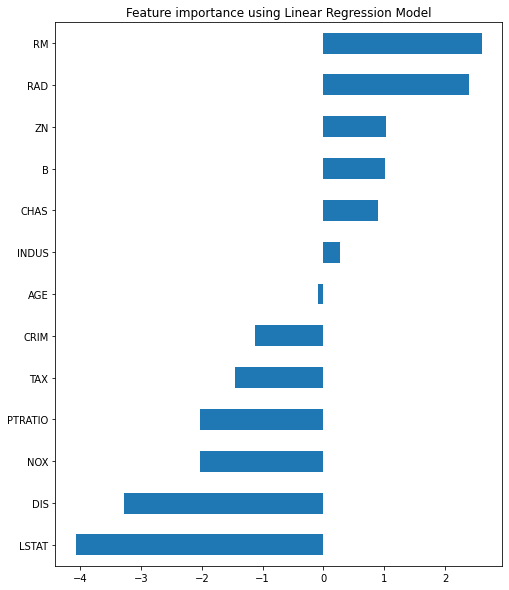

In [41]:
X_train_2, X_test_2, y_train_2, y_test_2 = prepare_X_and_y(houses_2)

mse_2 = linear_regression(X_train_2, y_train_2, X_test_2, y_test_2, houses_2.drop('MEDV', axis=1).columns)
mse_2

Ошибка стала меньше! Попроуем что-нибудь сделать с другими выбросами:

In [42]:
houses_2[houses_2['ZN'] > 45]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
39,0.02763,75.0,2.95,0,0.4280,6.595,21.8,5.4011,3,252,18.3,395.63,4.32,30.8
40,0.03359,75.0,2.95,0,0.4280,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
54,0.01360,75.0,4.00,0,0.4100,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9
55,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
56,0.02055,85.0,0.74,0,0.4100,6.383,35.7,9.1876,2,313,17.3,396.90,5.77,24.7
57,0.01432,100.0,1.32,0,0.4110,6.816,40.5,8.3248,5,256,15.1,392.90,3.95,31.6
65,0.03584,80.0,3.37,0,0.3980,6.290,17.8,6.6115,4,337,16.1,396.90,4.67,23.5
66,0.04379,80.0,3.37,0,0.3980,5.787,31.1,6.6115,4,337,16.1,396.90,10.24,19.4
193,0.02187,60.0,2.93,0,0.4010,6.800,9.9,6.2196,1,265,15.6,393.37,5.03,31.1
194,0.01439,60.0,2.93,0,0.4010,6.604,18.8,6.2196,1,265,15.6,376.70,4.38,29.1


Много строк с большим значением у этого столбца. Поскольку это доля земли под жилую застройку, зонированная на участки площадью более 25 000 кв. футов, мы не можем считать это выбросами, ведь цифры вполне могут быть реальными. Также не хотелось бы их исключать из обучения, поскольку строк довольно много. Менять на среднее, моду или медиану тоже считаю не разумным.
Поступим так: исключим строки со значением более 45 и посмотрим на результат. Если результат окажется хуже, то тем лучше: мысль об исключении окажется неудачной.

21.336213355810106

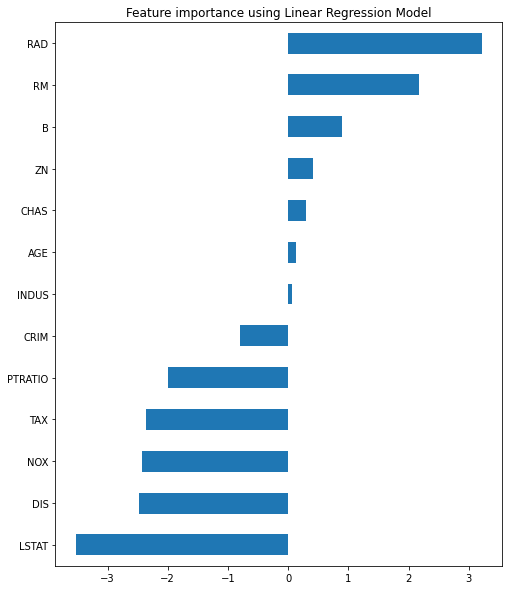

In [44]:
houses_3 = houses_2[houses_2['ZN'] <= 45]
X_train_3, X_test_3, y_train_3, y_test_3 = prepare_X_and_y(houses_3)

mse_3 = linear_regression(X_train_3, y_train_3, X_test_3, y_test_3, houses_3.drop('MEDV', axis=1).columns)
mse_3

Ошибка выросла. Но это при условии, если мы берем датасет, где убраны большие значения столбца с криминальными личностями. Если же мы возьмем изначальный датасет, то:

17.900515549935434

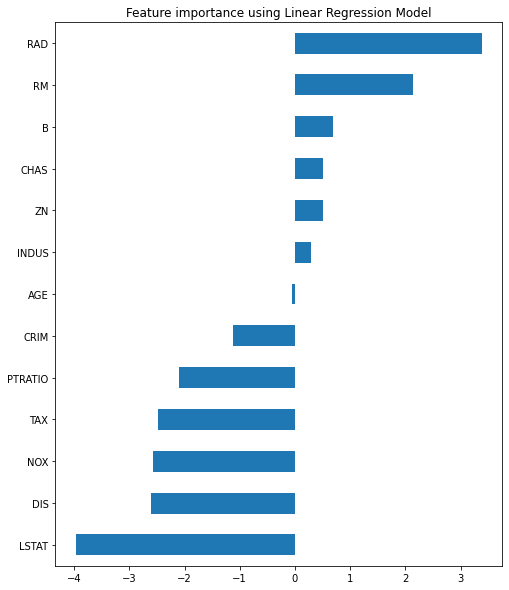

In [46]:
houses_4 = houses[houses['ZN'] <= 45]
X_train_4, X_test_4, y_train_4, y_test_4 = prepare_X_and_y(houses_4)

mse_4 = linear_regression(X_train_4, y_train_4, X_test_4, y_test_4, houses_4.drop('MEDV', axis=1).columns)
mse_4

...ошибка уменьшилась. Это хорошо, но при этом мы лишились 45 строк. Не смертельно, но для этого датасета существенно. Больше удалять нельзя.

Идём дальше: можно удалить попеременно, а затем оба столбца, у которых была существенная корреляция с другими столбцами:  DIS (расстояние до центров занятости) и TAX (налог).

23.471619953178685

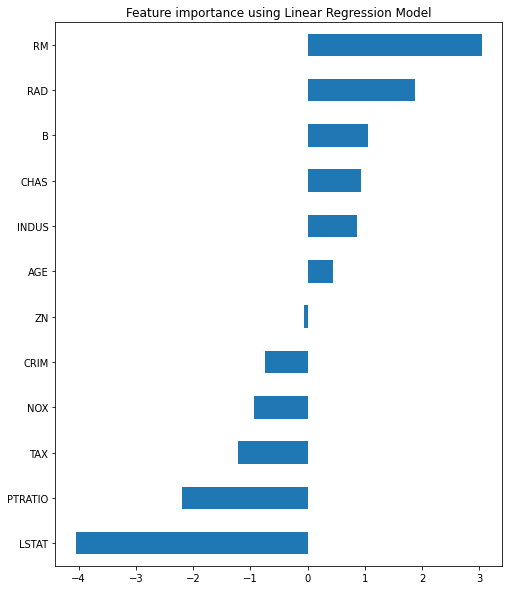

In [48]:
houses_5 = houses.drop('DIS', axis=1)
X_train_5, X_test_5, y_train_5, y_test_5 = prepare_X_and_y(houses_5)

mse_5 = linear_regression(X_train_5, y_train_5, X_test_5, y_test_5, houses_5.drop('MEDV', axis=1).columns)
mse_5

21.63484815153912

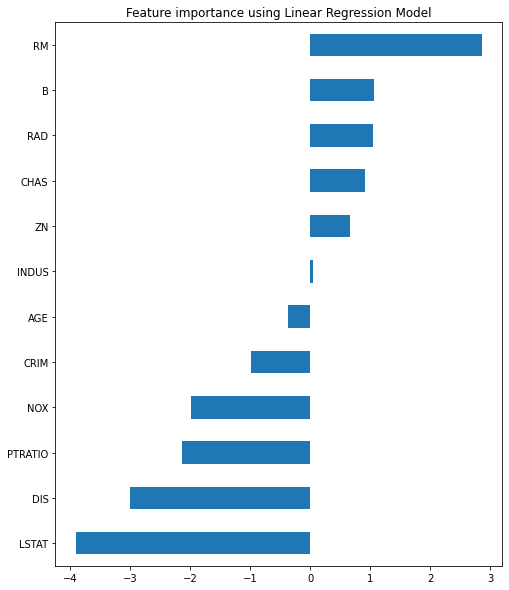

In [50]:
houses_6 = houses.drop('TAX', axis=1)
X_train_6, X_test_6, y_train_6, y_test_6 = prepare_X_and_y(houses_6)

mse_6 = linear_regression(X_train_6, y_train_6, X_test_6, y_test_6, houses_6.drop('MEDV', axis=1).columns)
mse_6

24.459763377014323

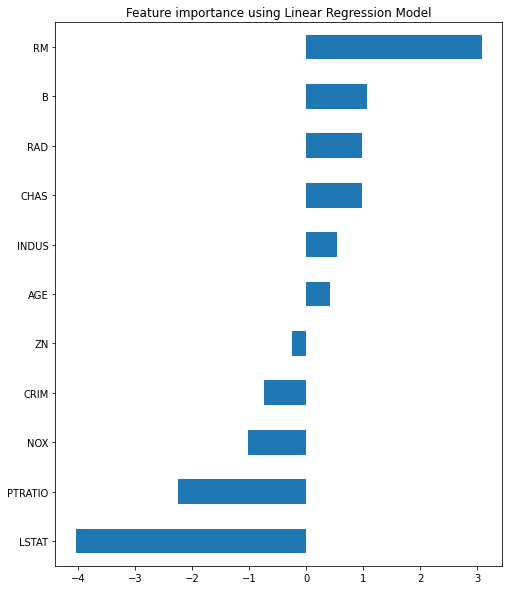

In [52]:
houses_7 = houses.drop(['TAX','DIS'], axis=1)
X_train_7, X_test_7, y_train_7, y_test_7 = prepare_X_and_y(houses_7)

mse_7 = linear_regression(X_train_7, y_train_7, X_test_7, y_test_7, houses_7.drop('MEDV', axis=1).columns)
mse_7

Лучше всего был результат когда мы убирали 'TAX'. А если нам убрать столбец 'TAX' при использовании датасета houses_4?

17.907158773638198

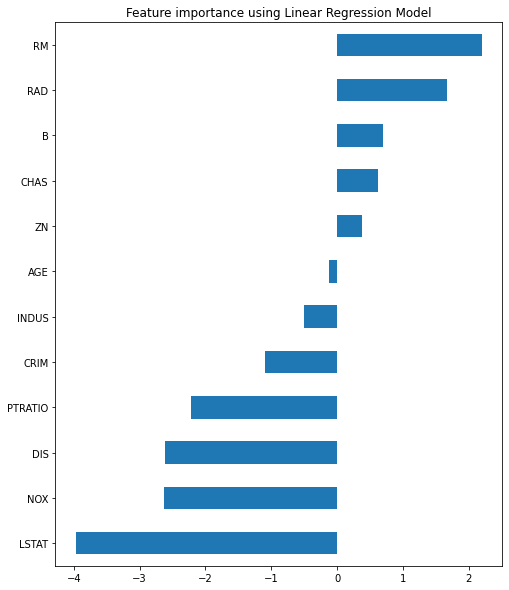

In [54]:
houses_8 = houses_4.drop('TAX', axis=1)
X_train_8, X_test_8, y_train_8, y_test_8 = prepare_X_and_y(houses_8)

mse_8 = linear_regression(X_train_8, y_train_8, X_test_8, y_test_8, houses_8.drop('MEDV', axis=1).columns)
mse_8

Нет, чуть похуже результат, чем когда мы просто убрали выбросы в столбце 'ZN'. Получается, самый лучший результат для нас - houses_4.

И, наконец, посмотрим, что будет, если мы попеременно будем убирать по одной колонке из фичей. Сравним: может, где-то результат будет лучше?

In [56]:
for i in houses.drop('MEDV', axis=1).columns:
    X_i = houses.drop(i, axis=1)
    X_train_i, X_test_i, y_train_i, y_test_i = prepare_X_and_y(X_i)

    model_i = LinearRegression().fit(X_train_i, y_train_i)
    predict_i = model_i.predict(X_test_i)
    mse_i = mean_squared_error(y_test_i, predict_i) 
    print('\x1b[1;0346m'+'Drop {}'.format(i) +'\x1b[0m')
    print(X_i.columns)
    print('\x1b[1;0346m'+'MSE: {}'.format(mse_i) +'\x1b[0m')
    print()

Drop CRIM
Index(['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
MSE: 20.872014290513437

Drop ZN
Index(['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
MSE: 21.632248849115427

Drop INDUS
Index(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
MSE: 20.60199089927882

Drop CHAS
Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
MSE: 20.77255487152918

Drop NOX
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
MSE: 22.076883292916975

Drop RM
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
MSE: 23.74282

Итак, остановимся на этом этапе. Поскольку в предобработку данных можно закопаться на длительное время, надо уметь остановиться. Выберем оптимальный для нас вариант. Им оказался датафрейм houses_4, в котором мы удалили часть строк со слишком большими значениями в столбце 'ZN'. Получается, он для нас наиболее значим, хотя первое обучение (на изначальных данных) не показало этот столбец как один из лучших на графике "Best Features". Видимо, этому помешали выбросы в столбце.

### Выводы

Таким образом, в данной работе реализован эксплоративный анализ данных, позволивший найти оптимальный вариант в целях минимизации среднеквадратичной ошибки предсказаний для модели линейной регрессии.
Работа состояла из нескольких шагов:
- На первом шаге было ознакомление с данными, их первичный осмотр на предмет неверных типов данных и пропусков.  
- Вторым шагом был анализ данных, выявление закономерностей, аномалий и взаимосвязей. В результате этого шага появились несколько идей обработки датафрема для оптимального обучения модели.  
- На третьем шаге мы обучали линейную регрессию, попутно работая с данными. В результате множества экспериментов выделен наиболее выигрышный: это датафрейм "houses_4", который появился в результате удаления выбросов со значением больше 45 из столбца "ZN" (доля земли под жилую застройку, зонированная на участки площадью более 25 000 кв. футов.) Он показал наилучший результат - ошибка уменьшилась на 3 единицы.  

Соответственно, цель данной работы - закрепить полученные навыки - достигнута. Навыки закреплены, MSE уменьшена.